<a href="https://colab.research.google.com/github/GrigoryBartosh/dul_2021/blob/main/Homework/hw3/Homework3_autoregressive_flows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi

In [ ]:
! if [ -d HSE.Deep_Unsupervised_Learning ]; then rm -Rf HSE.Deep_Unsupervised_Learning; fi
! git clone https://github.com/SpirinEgor/HSE.Deep_Unsupervised_Learning.git
%cd HSE.Deep_Unsupervised_Learning
! git checkout hw3

Cloning into 'deepul'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 362 (delta 116), reused 154 (delta 49), pack-reused 99
Receiving objects: 100% (362/362), 72.79 MiB | 30.24 MiB/s, done.
Resolving deltas: 100% (153/153), done.
Processing ./deepul
  Created wheel for deepul: filename=deepul-0.1.0-cp36-none-any.whl size=7175 sha256=2699388bc179bccdfcd1036e985b534d342fb829a317f3d5a41ffb676c5b026d
  Stored in directory: /tmp/pip-ephem-wheel-cache-4n8pba8e/wheels/39/1a/4b/a6f51db275abb2e5dae32540e06ed5011e792f162467bd3aa8
Successfully built deepul
  Found existing installation: deepul 0.1.0
    Uninstalling deepul-0.1.0:
      Successfully uninstalled deepul-0.1.0


In [ ]:
! pip install -r requirements.txt

In [ ]:
! git pull

In [2]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset

from flow.trainer import Trainer
from utils.hw3_utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams["axes.labelsize"] = 25.0
plt.rcParams["xtick.labelsize"] = 20.0
plt.rcParams["ytick.labelsize"] = 20.0
plt.rcParams["legend.fontsize"] = 18.0

plt.rcParams["figure.figsize"] = [8.0, 6.0]


# Question 1: Autoregressive Flows for Images

Adapt your PixelCNN implementation from Homework 2 and use it as an autoregressive flow model on the black-and-white shapes dataset. Using the base architecture from Homework 2 1(a), output a mixture of logistics or gaussians (instead of logits), whose CDF we will use as our flow for each dimension of x. 

Remember: you must dequantize the data and scale it between 0 and 1 for the autoregressive flow to have stable training. 

**You will provide these deliverables**

1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. **Make sure to account for any rescaling you do in your nats/dim.**
2.   Report the final test set performance of your final model
3. 100 samples from your autoregressive flow. Our plotting code will show your samples, with and without clipping and flooring (to remove the quantization). 


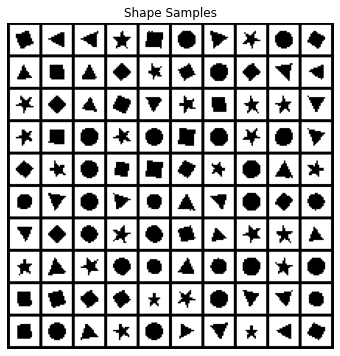

In [4]:
visualize_q1_data()

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [20]:
class Q1Dataset(Dataset):
    def __init__(self, data):
        self.__data = torch.tensor(data.transpose(0, 3, 1, 2), dtype=torch.float)
    def __len__(self):
        return self.__data.shape[0]
    def __getitem__(self, item):
        return self.__data[item]

def q1(train_data, test_data):
    """
    train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    test_data: A (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    H = W = 20
    Note that you should dequantize your train and test data, your dequantized pixels should all lie in [0,1]

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 1) of samples with values in [0, 1], where [0,0.5] represents a black pixel
        and [0.5,1] represents a white pixel. We will show your samples with and without noise.
    """
    _, height, weight, n_channels = train_data.shape
    pixel_cnn_flow_trainer = Trainer(3, n_channels, height, weight, pixel_n_layers=3, pixel_n_filters=3)

    train_dataloader = DataLoader(Q1Dataset(train_data), batch_size=10, shuffle=True)
    test_dataloader = DataLoader(Q1Dataset(test_data), batch_size=20)

    train_losses, test_losses =\
        pixel_cnn_flow_trainer.fit(train_dataloader, n_epochs=5, lr=1e-3, clip_norm=5, test_dataloader=test_dataloader)

    samples = pixel_cnn_flow_trainer.model.sample(100, pixel_cnn_flow_trainer.device).detach().cpu().numpy()
    return train_losses, test_losses, samples

### Results

Once you've implemented `q1`, execute the cells below to visualize and save your results



Use cpu device


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Final Test Loss: 1.0344


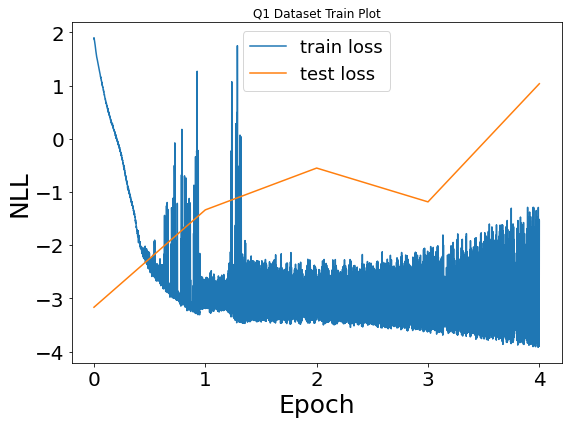

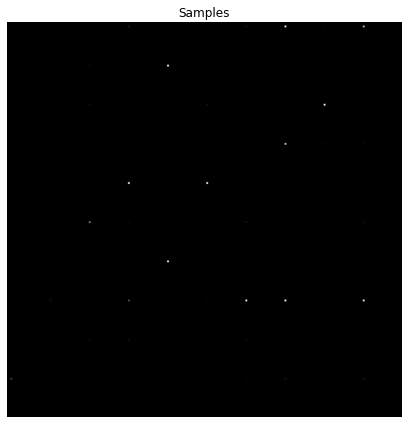

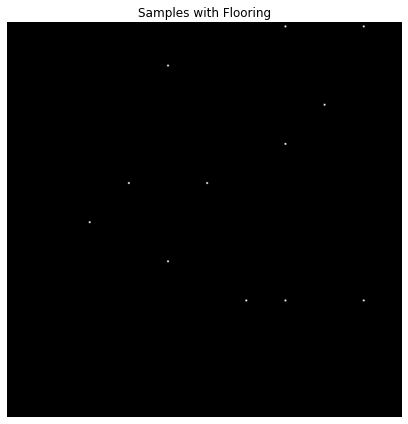

In [21]:
q1_save_results(q1)